<a href="https://colab.research.google.com/github/Utkarsh-Rane43/FODS-PROJECT/blob/main/FODS_PART3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the Catboost Library

In [21]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


Importing all Libraries like XGBRegressor, catBoostRegressor, and various libraries to find which algorithm will be best for our model.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt


Loading the dataset

In [23]:
df = pd.read_csv('/content/cardekho_dataset.csv')

Preparing feaatures and target

In [24]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

Splitting the data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Preparing the pre processor

In [26]:
numeric_features = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
categorical_features = ['brand', 'model', 'fuel_type', 'seller_type', 'transmission_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [27]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0)
}

In [28]:
results = {}

In [29]:
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}


In [30]:
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R2: {metrics['R2']:.4f}")
    print()


Linear Regression:
  MSE: 150427466843.51
  RMSE: 387849.80
  R2: 0.8002

Decision Tree:
  MSE: 79797079861.09
  RMSE: 282483.77
  R2: 0.8940

XGBoost:
  MSE: 59344454257.36
  RMSE: 243607.17
  R2: 0.9212

CatBoost:
  MSE: 31494188996.37
  RMSE: 177466.02
  R2: 0.9582



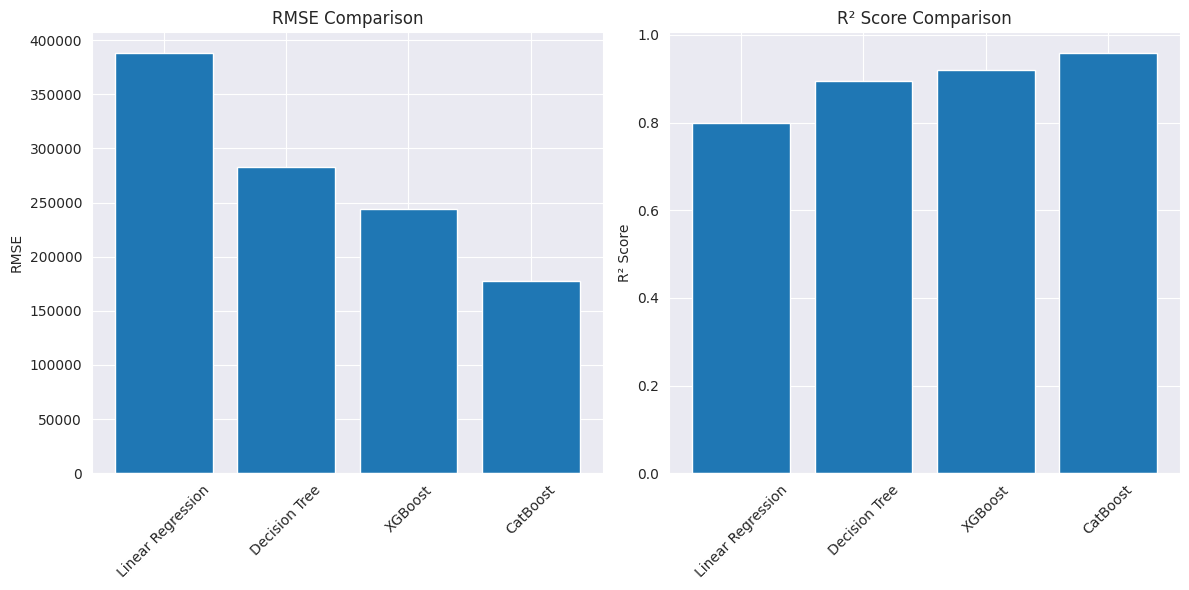

In [ ]:
plt.figure(figsize=(12, 6))
x = list(results.keys())
y_rmse = [metrics['RMSE'] for metrics in results.values()]
y_r2 = [metrics['R2'] for metrics in results.values()]

plt.subplot(1, 2, 1)
plt.bar(x, y_rmse)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(x, y_r2)
plt.title('R\u00b2 Score Comparison')
plt.ylabel('R\u00b2 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [32]:
best_model = max(results, key=lambda x: results[x]['R2'])
print(f"The best performing model is: {best_model}")
print(f"R\u00b2 Score: {results[best_model]['R2']:.4f}")
print(f"RMSE: {results[best_model]['RMSE']:.2f}")

The best performing model is: CatBoost
R² Score: 0.9582
RMSE: 177466.02
